In [1]:
import numpy as np
rand = np.random.RandomState(42)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling

In [4]:
# Concatenation of arrays
x = np.array([1,2,3])
y = np.array([3,2,1])
np.concatenate([x,y,x])

array([1, 2, 3, 3, 2, 1, 1, 2, 3])

In [6]:
grid = np.array([[1,2,3],
                [4,5,6]])
grid

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
np.concatenate([grid,grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [12]:
np.concatenate([grid,grid], axis = 1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [23]:
x = np.array([1,2,3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4],
                 [5, 7, 9]])
np.vstack([x,grid]) # shapes 1x3 and 3x3

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4],
       [5, 7, 9]])

In [28]:
y = x.reshape(3,1)
np.hstack([y,grid]) # shapes 3x1 and 3x3

array([[1, 9, 8, 7],
       [2, 6, 5, 4],
       [3, 5, 7, 9]])

In [31]:
z = x.reshape(3,1,1)
grid_3d = grid.reshape(3,1,3)
np.dstack([z,grid_3d]) 
# all the input array dimensions except for the concatenation axis must match exactly

array([[[1, 9, 8, 7]],

       [[2, 6, 5, 4]],

       [[3, 5, 7, 9]]])

In [32]:
# splitting
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3) # N split points lead to N+1 subarrays

[1 2 3] [99 99] [3 2 1]


In [33]:
grid = np.arange(16).reshape(4,4)
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [34]:
upper, lower = np.vsplit(grid,[2])
print(upper,'\n')
print(lower)

[[0 1 2 3]
 [4 5 6 7]] 

[[ 8  9 10 11]
 [12 13 14 15]]


In [35]:
left, right = np.hsplit(grid,[2])
print(left,'\n')
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]] 

[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


In [44]:
one,two = np.dsplit(grid_3d,[1])
print(one,'\n\n')
print(two)
# dsplit (depth split) works on 3d or higher arrays 

[[[9]]

 [[6]]

 [[5]]] 


[[[8 7]]

 [[5 4]]

 [[7 9]]]


In [2]:
# np.ufunc()

# Functions that operate element by element on whole arrays.

In [2]:
# reduce function
x = np.arange(1,6)
print(x)
# A reduce repeatedly applies a given operation to the 
# elements of an array until only a single result remains.
print(np.add.reduce(x))
print(np.multiply.reduce(x))

[1 2 3 4 5]
15
120


In [4]:
# to store all the intermediate results of the computation, 
# we can instead use accumulate
print(np.add.accumulate(x))
print(np.multiply.accumulate(x))

[ 1  3  6 10 15]
[  1   2   6  24 120]


In [3]:
# any ufunc can compute the output of all pairs of two different inputs using
# the outer method.
print(x)
print(np.add.outer(x,x))
print(np.multiply.outer(x,x))

[1 2 3 4 5]
[[ 2  3  4  5  6]
 [ 3  4  5  6  7]
 [ 4  5  6  7  8]
 [ 5  6  7  8  9]
 [ 6  7  8  9 10]]
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


In [6]:
# Return random floats in the half-open interval [0.0, 1.0).
L = np.random.random(5)
print(L)
np.sum(L) # preferred over sum(L)

[0.30441285 0.86667426 0.33488778 0.50803259 0.77194247]


2.785949944527505

In [7]:
m = np.arange(12).reshape([3,4])
print(m)
print(m.sum(axis=0)) # sum over column
print(m.max(axis=1)) # operation over row
# The axis keyword specifies the dimension of the array that will be collapsed,
# rather than the dimension that will be returned .So specifying axis=0 means that the
# first axis will be collapsed: for two-dimensional arrays, this means that values within
# each column will be aggregated.

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[12 15 18 21]
[ 3  7 11]


In [8]:
# Broadcasting
a = np.arange(5)
b = np.arange(6,11)
print('a >>> ',a ,'\n','b >>> ',b,sep='')
print('a+b >>>',a+b)
# we can just as easily add a scalar (think of it as a zero-
# dimensional array) to an array
print('a+5 >>>',a+5) # broadcasting

a >>> [0 1 2 3 4]
b >>> [ 6  7  8  9 10]
a+b >>> [ 6  8 10 12 14]
a+5 >>> [5 6 7 8 9]


In [9]:
m = np.ones([3,5])
m

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [10]:
m + a
# the one-dimensional array a is stretched, or broadcast, across the second
# dimension in order to match the shape of M

array([[1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.]])

In [11]:
# broadcasting of both the arrays
a = np.arange(3)
b = np.arange(3).reshape(3,1)
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [12]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting
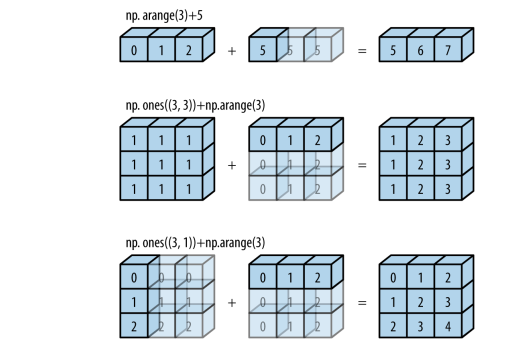

Rules of Broadcasting
Broadcasting in NumPy follows a strict set of rules to determine the interaction
between the two arrays:

• Rule 1: If the two arrays differ in their number of dimensions, the shape of the
one with fewer dimensions is padded with ones on its leading (left) side.

• Rule 2: If the shape of the two arrays does not match in any dimension, the array
with shape equal to 1 in that dimension is stretched to match the other shape.

• Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is
raised.

In [4]:
# centring an array
x = np.random.random([10,3])
print(x.mean(0))
x_centred = x - x.mean(0)
print(x_centred.mean(0)) # mean along each column = 0 

[0.51117053 0.50497348 0.53800289]
[0.00000000e+00 0.00000000e+00 5.55111512e-17]


In [6]:
x_normal = np.divide(np.subtract(x, x.mean(0)), x.std(0))
print(x)
print(x_normal)

[[0.57151785 0.31150303 0.72920684]
 [0.87486791 0.08590013 0.76802532]
 [0.62522148 0.74069348 0.7773096 ]
 [0.15968614 0.92321262 0.75115722]
 [0.84057287 0.34963696 0.10056412]
 [0.40423933 0.05955925 0.77193775]
 [0.57416563 0.86902238 0.11541379]
 [0.67131891 0.03611463 0.5288825 ]
 [0.19893381 0.95453008 0.79229402]
 [0.19118138 0.71956224 0.04523774]]
[[ 0.24198872 -0.5436249   0.62888003]
 [ 1.45840222 -1.17753747  0.75655609]
 [ 0.45733672  0.6623402   0.78709257]
 [-1.40942897  1.17519346  0.70107599]
 [ 1.32088139 -0.43647389 -1.43875952]
 [-0.42878699 -1.25155164  0.76942428]
 [ 0.25260615  1.02292647 -1.38991817]
 [ 0.64218432 -1.31742774 -0.02999744]
 [-1.25204842  1.26319114  0.83637712]
 [-1.28313514  0.60296438 -1.62073095]]


In [14]:
# Comparision operators
x = np.arange(6)
print('x < 3 : ',x < 3)
print('(2*x) == (x**2): ',(2*x) == (x**2))

x < 3 :  [ True  True  True False False False]
(2*x) == (x**2):  [ True False  True False False False]


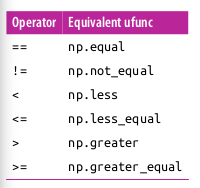

In [15]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
np.count_nonzero(x < 6)

8

In [16]:
np.sum(x < 6)

8

In [17]:
np.sum(x<6,axis = 1)

array([4, 2, 2])

In [18]:
np.any(x>8)

True

In [19]:
np.all(x>8,axis = 0)

array([False, False, False, False])

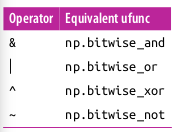

In [20]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [21]:
#masking
x[x>5]

array([7, 9, 7, 6])

In [22]:
x[np.greater(x,5)]

array([7, 9, 7, 6])

In [23]:
# fancy indexing
# With fancy indexing, the shape of the result reflects the shape of the index arrays
# rather than the shape of the array being indexed:

x = rand.randint(100, size=10)
print(x)
ind = [3,5,7]
print(x[ind])

[51 92 14 71 60 20 82 86 74 74]
[71 20 86]


In [24]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [25]:
x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [26]:
row = np.array([0,1,2])
col = np.array([2,1,3])
x[row,col]

array([ 2,  5, 11])

In [27]:
col_vec = col[:,np.newaxis]
col_vec

array([[2],
       [1],
       [3]])

In [28]:
# fancy indexing follows broadcasting
x[row,col_vec]

array([[ 2,  6, 10],
       [ 1,  5,  9],
       [ 3,  7, 11]])

In [29]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [30]:
x[2,[2,0,1]]

array([10,  8,  9])

In [31]:
print(row)
row[:,np.newaxis]

[0 1 2]


array([[0],
       [1],
       [2]])

In [32]:
mask = np.array([1,0,1,0],dtype=bool)
x[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [33]:
#Selecting Random Points
mean = [0,0]
cov = [[1,2],
      [2,5]]
x = rand.multivariate_normal(mean,cov,100)
x.shape

(100, 2)

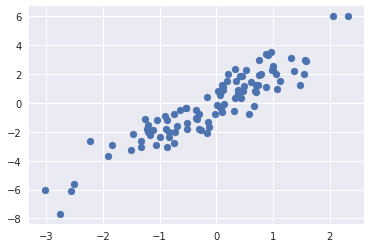

In [34]:
plt.scatter(x[:,0],x[:,1]);

In [35]:
# choosing 20 random indices with no repeats, and use these indices to select a 
# portion of the original array

indices = np.random.choice(x.shape[0],20,replace = False)
indices

array([32,  3, 14, 41, 53, 19, 57, 55, 30, 89, 64, 87, 15, 34, 46,  6, 90,
       52, 49, 96])

In [36]:
selection =x[indices]
selection.shape

(20, 2)

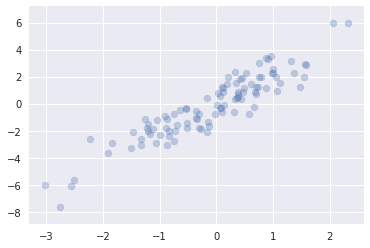

In [37]:
plt.scatter(x[:,0],x[:,1],alpha = 0.3)
plt.scatter(selection[:,0],selection[:,1],
           facecolor = 'none', s=200);

In [38]:
# Binning Data
np.random.seed(42)
x = np.random.randn(100)
# compute histogram from hand
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

# find appropriate bin for each x
i = np.searchsorted(bins,x)
# add 1 for each i in bin
np.add.at(counts,i,1)

np.split(x,indices_or_sections=)

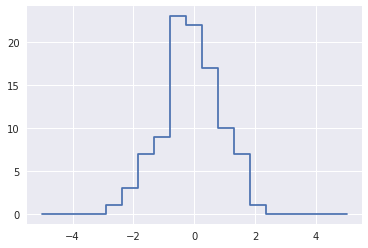

In [39]:
plt.plot(bins,counts,linestyle='steps');

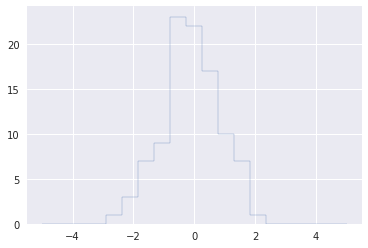

In [40]:
# histogram function
plt.hist(x,bins,histtype='step');

In [41]:
# Sorting

#selection sort
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i],x[swap]) = (x[swap],x[i])
    return x


In [42]:
x = np.array([2,1,5,4,6])
selection_sort(x)

array([1, 2, 4, 5, 6])

In [43]:
# bogosort
# repeatedly apply random shuffle and checks if the 
def bogosort(x):
    while np.any(x[:-1]>x[1:]):
        np.random.shuffle(x)
    return x


In [44]:
x = np.array([2,1,5,4,6])
bogosort(x)

array([1, 2, 4, 5, 6])

In [45]:
# numpy sort function by default uses quick sort
x = np.array([2,1,5,4,6])
np.sort(x) # returns the sorted array

array([1, 2, 4, 5, 6])

In [46]:
x.sort() # sorts the original array
print(x)

[1 2 4 5 6]


In [47]:
# return the indices of sorted elements
x = np.array([2,1,5,4,6])
np.argsort(x)

array([1, 0, 3, 2, 4])

In [48]:
# sorting along rows or column
x = rand.randint(0,10,(4,6))
print(x)

[[5 6 9 6 9 2]
 [1 8 7 9 6 8]
 [3 3 0 7 2 6]
 [1 1 6 5 2 8]]


In [49]:
np.sort(x,axis = 0) # along column

array([[1, 1, 0, 5, 2, 2],
       [1, 3, 6, 6, 2, 6],
       [3, 6, 7, 7, 6, 8],
       [5, 8, 9, 9, 9, 8]])

In [50]:
#partial sort
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, kth=3)
# the first three values in the resulting array are the three smallest in the
# array, and the remaining array positions contain the remaining values. Within the
# two partitions, the elements have arbitrary order

array([2, 1, 3, 4, 6, 5, 7])

In [51]:
x = rand.randint(0,10,(4,6))
print(x)
np.partition(x,2,axis=1)

[[9 5 9 9 5 0]
 [3 9 5 5 4 0]
 [7 4 4 6 3 5]
 [3 2 6 7 3 1]]


array([[0, 5, 5, 9, 9, 9],
       [0, 3, 4, 5, 5, 9],
       [3, 4, 4, 6, 7, 5],
       [1, 2, 3, 7, 6, 3]])

[[0.51630035 0.32295647]
 [0.79518619 0.27083225]
 [0.43897142 0.07845638]
 [0.02535074 0.96264841]
 [0.83598012 0.69597421]
 [0.40895294 0.17329432]
 [0.15643704 0.2502429 ]
 [0.54922666 0.71459592]
 [0.66019738 0.2799339 ]
 [0.95486528 0.73789692]]


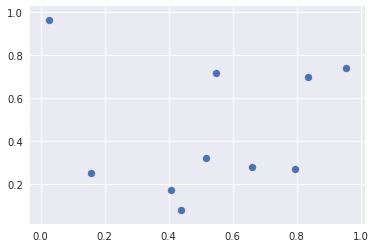

In [52]:
# K nearest Neighbour
x = rand.rand(10,2)
print(x)
plt.scatter(x[:,0],x[:,1],s=50);

In [53]:
y = x[:,np.newaxis,:]
print(y)
print(y.shape)
# How to read dimensions
# For highest dimension count the number of items in innermost brackets
# For 2nd highest dim count the number of single bracketted items inside two bracketted items

[[[0.51630035 0.32295647]]

 [[0.79518619 0.27083225]]

 [[0.43897142 0.07845638]]

 [[0.02535074 0.96264841]]

 [[0.83598012 0.69597421]]

 [[0.40895294 0.17329432]]

 [[0.15643704 0.2502429 ]]

 [[0.54922666 0.71459592]]

 [[0.66019738 0.2799339 ]]

 [[0.95486528 0.73789692]]]
(10, 1, 2)


In [54]:
# For each pair calculate difference between them
# original matrix: 3x2, 3 points in 2D
# algo:
# first matrix:  3x1x2 (row matrix with number of dim of space)
# Second matrix: 1x3x2 (column vector with number of dim of space)(vector got transposed)
# broadcasting with change both to 3x3x2
difference = x[:,np.newaxis,:] - x[np.newaxis,:,:]
difference.shape

(10, 10, 2)

In [55]:
# square the coordinate differences
sq_difference = np.square(difference)
sq_difference.shape

(10, 10, 2)

In [56]:
# sum the coordinate differences to get squared distance
# sum along the highest dimension which is also the dimension of space(2D in this case)
dist_sq = sq_difference.sum(axis=-1)
dist_sq.shape

(10, 10)

In [57]:
# Validate by checking diagonal matrix
print(dist_sq.diagonal())
print(np.round(dist_sq,2))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.   0.08 0.07 0.65 0.24 0.03 0.13 0.15 0.02 0.36]
 [0.08 0.   0.16 1.07 0.18 0.16 0.41 0.26 0.02 0.24]
 [0.07 0.16 0.   0.95 0.54 0.01 0.11 0.42 0.09 0.7 ]
 [0.65 1.07 0.95 0.   0.73 0.77 0.52 0.34 0.87 0.91]
 [0.24 0.18 0.54 0.73 0.   0.46 0.66 0.08 0.2  0.02]
 [0.03 0.16 0.01 0.77 0.46 0.   0.07 0.31 0.07 0.62]
 [0.13 0.41 0.11 0.52 0.66 0.07 0.   0.37 0.25 0.88]
 [0.15 0.26 0.42 0.34 0.08 0.31 0.37 0.   0.2  0.17]
 [0.02 0.02 0.09 0.87 0.2  0.07 0.25 0.2  0.   0.3 ]
 [0.36 0.24 0.7  0.91 0.02 0.62 0.88 0.17 0.3  0.  ]]


In [58]:
nearest = np.argsort(dist_sq,axis=1)
print(nearest)
# first column is the point itself
# argsort gives the argument for sorted list

[[0 8 5 2 1 6 7 4 9 3]
 [1 8 0 5 2 4 9 7 6 3]
 [2 5 0 8 6 1 7 4 9 3]
 [3 7 6 0 4 5 8 9 2 1]
 [4 9 7 1 8 0 5 2 6 3]
 [5 2 0 6 8 1 7 4 9 3]
 [6 5 2 0 8 7 1 3 4 9]
 [7 4 0 9 8 1 5 3 6 2]
 [8 1 0 5 2 7 4 6 9 3]
 [9 4 7 1 8 0 5 2 6 3]]


In [59]:
# Using arg
k = 2
nearest_partition = np.argpartition(dist_sq,k+1,axis =1)
print(nearest_partition)

[[0 5 8 2 1 6 7 4 3 9]
 [8 1 0 5 2 4 6 7 3 9]
 [2 5 0 8 6 1 7 4 3 9]
 [7 3 6 0 4 5 1 2 8 9]
 [4 9 7 1 8 0 5 6 3 2]
 [2 5 0 6 8 1 7 4 3 9]
 [6 5 2 0 8 7 1 3 4 9]
 [7 4 0 9 8 5 1 3 2 6]
 [8 1 0 5 2 7 4 6 3 9]
 [9 4 7 1 8 0 5 6 3 2]]


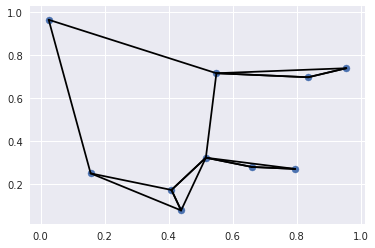

In [60]:
plt.scatter(x[:,0],x[:,1],s=50)
k=2
for i in range(x.shape[0]):
    for j in nearest_partition[i,:k+1]:
        plt.plot(*zip(x[j],x[i]),color='black')

In [71]:
# Structured Numpy data
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [82]:
data = np.zeros(4, dtype={'names':['name','age','weight'],
                          'formats': ['U10','i4','f8']})
print(data.dtype)
# 'U10'  translates  to  “Unicode  string  of  maximum  length  10,”  
# 'i4'  translates  to “4-byte  (i.e.,  32  bit)  integer,”  and  
# 'f8'  translates  to  “8-byte  (i.e.,  64  bit)  float.”

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [91]:
data['name'] = name
data['age']= age
data['weight'] =  weight
print(data)
print(data['name'])
print(data[-1]['age'])  # age of last row element

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]
['Alice' 'Bob' 'Cathy' 'Doug']
19


In [92]:
# name with age gt than 30
data[data['age']>30]['name']

array(['Bob', 'Cathy'], dtype='<U10')

In [93]:
# alternate ways to create structured arrays
# compound type as list of tuples
np.dtype([('name','S10'),('age','i4'),('weight','f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [95]:
np.dtype('S10,i4,f8') # without type names

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

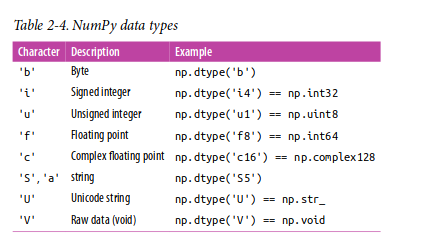

In [103]:
tp = np.dtype([('id','i8'),('mat','f8',(3,3))]) # 3x3 floatpoint matrix
x = np.zeros(3,dtype =tp)
print(x)
print(x[0])
print(x['mat'][0])

[(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
 (0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
 (0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])]
(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
